<b> Example of gammapy calculations </b>

In [7]:
# Import libaries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from gammapy import gammapy
from IPython.display import display

In [2]:
# Import dataset 
data = np.loadtxt("Ferro 3d.dat", skiprows= 1, unpack=False)
df = pd.DataFrame(data, columns=['X','Y','Z','fe'])
display(df.head(8))

,X,Y,Z,fe
0,1080.0,1027.9,506.2,51.1
1,1080.0,1021.1,494.5,51.1
2,1614.0,1030.7,375.0,45.1
3,1614.0,1023.2,362.1,45.1
4,1614.0,1005.3,331.1,41.5
5,1513.0,1043.5,395.4,41.1
6,1513.0,1036.0,382.4,41.1
7,1513.0,1019.9,354.5,45.9


In [3]:
# Create python object containing all experimental values 

nlags = 10
lagdistance= 80
lineartolerance = 40
htolerance = 45.0
vtolerance = 45.0
hband = 40
vband = 40 
vband = 40
azimuth = 157
dip = 30

gamma = gammapy.funcs_3D(df,'X','Y','Z','fe','fe',nlags,lagdistance,
                         lineartolerance, htolerance, vtolerance, 
                         hband, vband, azimuth,dip)

In [8]:
# Calculate variogram values 
variogram = gamma.calculate_experimental_function("Variogram")

IndexError: boolean index did not match indexed array along dimension 0; dimension is 11 but corresponding boolean dimension is 713415

In [14]:
display(variogram)

,Spatial continuity,Number of pairs,Average distance
0,16.585246,203.0,24.735203
1,31.040999,1951.0,94.541947
2,38.662428,1207.0,146.669131
3,46.917681,1093.0,233.787916
4,40.571412,712.0,326.654108
5,44.549707,222.0,388.979664
6,56.393472,193.0,467.487249
7,22.167500,4.0,541.628992
8,86.333125,8.0,606.919709


D:\Drive\PROGRAMAS\GAMMAPY_PROJ\gammapy-\gammapy\gammapy.py:186: RuntimeWarning: invalid value encountered in greater_equal
  (check_bandh.values < self.hband)&


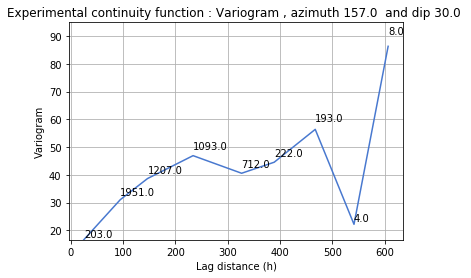

In [16]:
gamma.plot_experimental_function('Variogram', show_pairs=True)

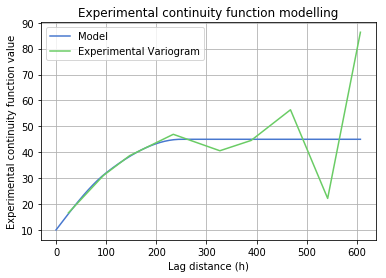

,distances,model
0,0.000000,10.000000
1,3.049848,10.777613
2,6.099696,11.554637
3,9.149543,12.330483
4,12.199391,13.104563
5,15.249239,13.876287
6,18.299087,14.645066
7,21.348934,15.410311
8,24.398782,16.171434
9,27.448630,16.927846


In [17]:
# Modelling experimental variogram
gamma.modelling(experimental_dataframe = variogram, 
                rotation_reference = [157,30,0],
                model_func = ["Spherical", "Spherical"],
                ranges =[[100,50,50],[250,50,50]],
                contribution = [5,30],
                nugget = 10,
                inverted = False)

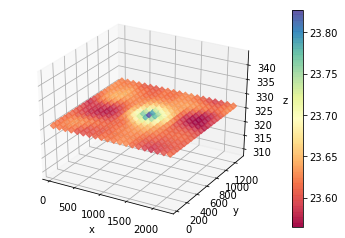

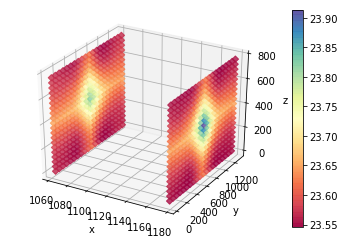

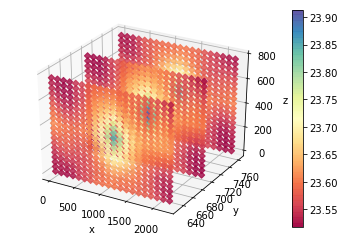

In [20]:
# Calculate average covariogram maps in three dimensions 
gamma.covariogram_map_3d('fe',5,division=20, cutz=[300,350], alpha=0.8)
gamma.covariogram_map_3d('fe',5,division=20, cutx=[1000,1200], alpha=0.8)
gamma.covariogram_map_3d('fe',5,division=20, cuty=[600,800], alpha=0.8)
